# Treehouse Childhood Cancer Data Initiative


## Clinical Data

Notebook exploring the [clinical data](https://xenabrowser.net/datapages/?dataset=treehouse_public_samples_clinical_metadata.2017-07-24.tsv&host=https://treehouse.xenahubs.net) associated with Treehouse.

Summary:
* There are not many phenotype indicators available
  * Age, gender, disease, and sample ID info
* There are 11,078 tumors included in this dataset
  * 9,806 are from TCGA
  * 723 are from TARGET
  * 549 are from Treehouse
* 10,865 have complete age information
  * Bimodal distribution with mean 53.5 and std 20.9
* AML, ALL, Neuroblastoma, and Wilm's Tumor have the most pediatric samples
  * {AML: 224, ALL: 194, NB: 163, WT: 123}
* Treehouse data identifiers and disease names are not standardized

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('seaborn-notebook')

In [3]:
sns.set(style="white", color_codes=True)
sns.set_context("paper",
                rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":20,
                    'xtick.labelsize':14, 'ytick.labelsize': 14})

In [4]:
# Load Clinical Data
clinical_file = 'https://treehouse.xenahubs.net/download/treehouse_public_samples_clinical_metadata.2017-07-24.tsv'
clinical_df = pd.read_table(clinical_file, index_col=0)
print(clinical_df.shape)
clinical_df.head(2)

(11078, 3)


,age_in_years,gender,disease
sample_id,,,
TH03_0010_S01,11.0,female,"acute leukemia of ambiguous lineage, CNS1"
TH03_0010_S02,11.0,female,"acute leukemia of ambiguous lineage, CNS1"


In [5]:
# Process clinical data
def parse_sample_id(row):
    """
    Assign appropriate Treehouse identifiers to columns - for use in pd.apply()
    """
    if row['sample_type'] is None:
        resource = row['resource'][:2]
        sample_type = row['additional_code']
        addit_code = row['resource'][2:]
        row['resource'] = resource
        row['sample_type'] = sample_type
        row['additional_code'] = addit_code
    return row

tumor_name = clinical_df.index.str.replace('-', '_').str.split('_')
index_split_df = pd.DataFrame([x for x in tumor_name],
                              columns=['resource', 'tumor_code',
                                       'additional_code', 'sample_type'])
index_split_df = index_split_df.apply(parse_sample_id, axis=1)
index_split_df.index = clinical_df.index

clinical_full_df = pd.concat([clinical_df, index_split_df], axis=1)
clinical_full_df.head(2)

,age_in_years,gender,disease,resource,tumor_code,additional_code,sample_type
sample_id,,,,,,,
TH03_0010_S01,11.0,female,"acute leukemia of ambiguous lineage, CNS1",TH,0010,03,S01
TH03_0010_S02,11.0,female,"acute leukemia of ambiguous lineage, CNS1",TH,0010,03,S02


In [6]:
# How many samples belong to each resource
target_data = clinical_df[clinical_full_df['resource'] == 'TARGET']
treehouse_data = clinical_df[clinical_full_df['resource'] == 'TH']
tcga_data = clinical_df[clinical_full_df['resource'] == 'TCGA']

clinical_full_df['resource'].value_counts()

TCGA      9806
TARGET     723
TH         549
Name: resource, dtype: int64

## Age

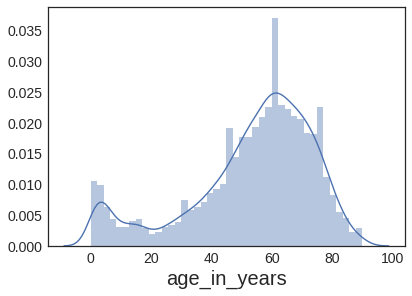

In [7]:
sns.distplot(clinical_full_df['age_in_years'].dropna());

In [8]:
clinical_full_df['age_in_years'].describe()

count    10865.000000
mean        53.490637
std         20.850448
min          0.000000
25%         44.000000
50%         58.000000
75%         68.000000
max         90.000000
Name: age_in_years, dtype: float64

### Visualize distribution of age and disease

In [9]:
target_data['disease'].value_counts()

acute myeloid leukemia                224
acute lymphoblastic leukemia          194
neuroblastoma                         162
wilms tumor                           123
clear cell sarcoma of the kidney       11
clear cell carcinoma of the kidney      2
Name: disease, dtype: int64

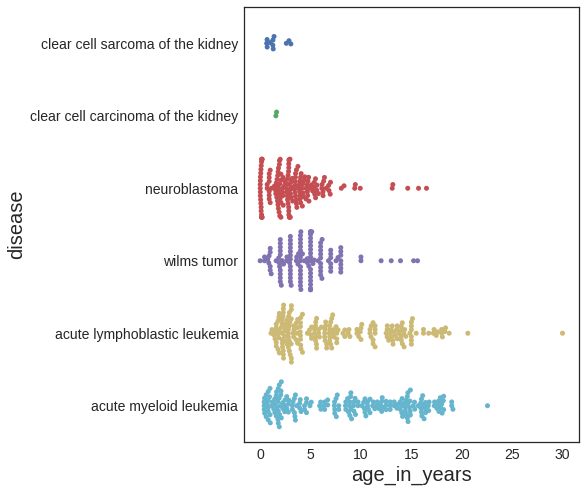

In [10]:
target_order = target_data.groupby('disease').mean().sort_values('age_in_years')
plt.figure(figsize=(6, 8))
g = sns.swarmplot(y='disease', x='age_in_years', data=target_data, order=target_order.index);

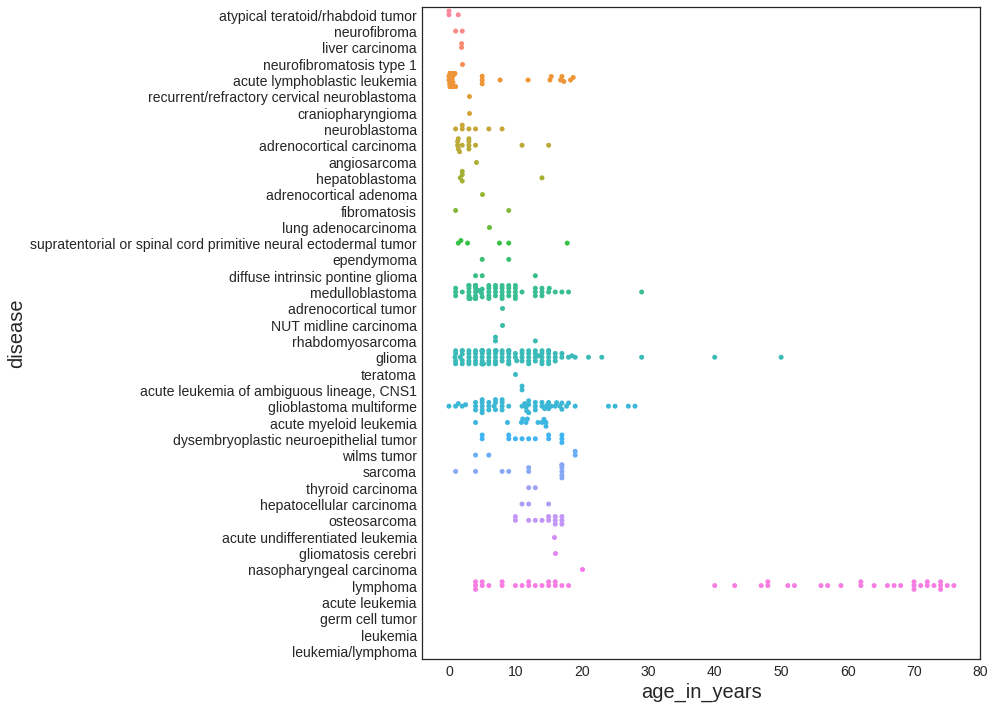

In [11]:
th_order = treehouse_data.groupby('disease').mean().sort_values('age_in_years')
plt.figure(figsize=(10, 12))
g = sns.swarmplot(y='disease', x='age_in_years', data=treehouse_data, order=th_order.index);

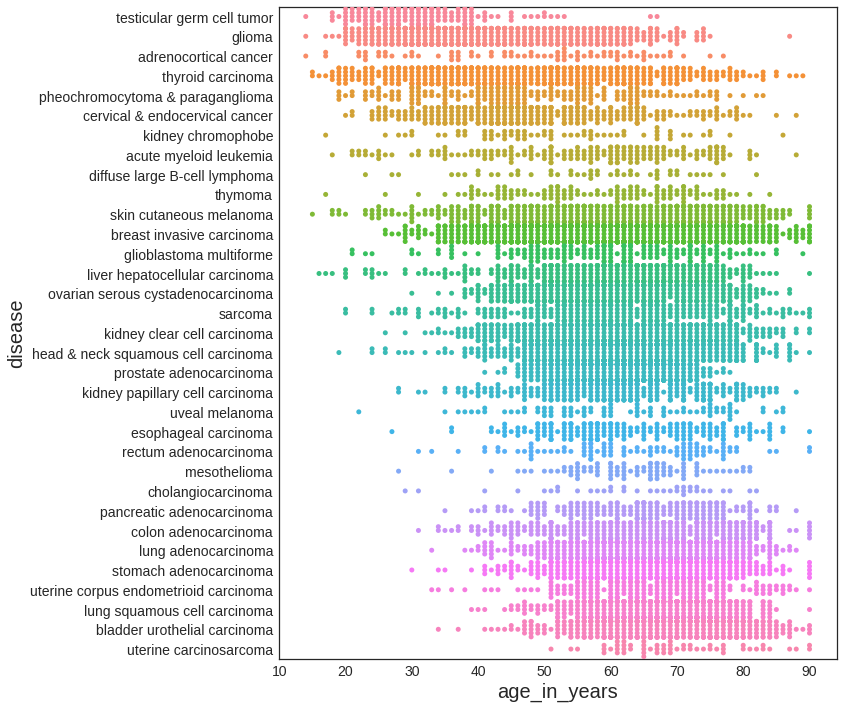

In [12]:
tcga_order = tcga_data.groupby('disease').mean().sort_values('age_in_years')
plt.figure(figsize=(10, 12))
g = sns.swarmplot(y='disease', x='age_in_years', data=tcga_data, order=tcga_order.index);

## Gender

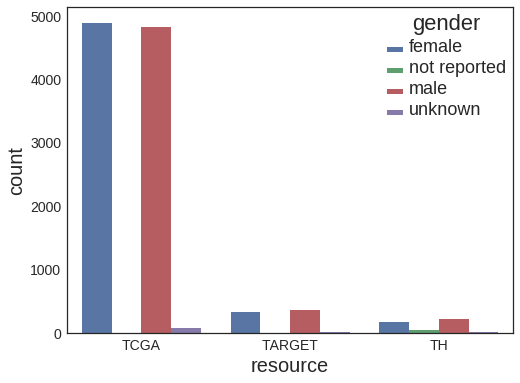

In [13]:
plt.figure(figsize=(8, 6))
g = sns.countplot(x="resource", hue='gender', data=clinical_full_df,
                  order=['TCGA', 'TARGET', 'TH']);
plt.setp(g.get_legend().get_texts(), fontsize='18');
plt.setp(g.get_legend().get_title(), fontsize='22');

## Disease

In [14]:
target_data['disease'].value_counts()

acute myeloid leukemia                224
acute lymphoblastic leukemia          194
neuroblastoma                         162
wilms tumor                           123
clear cell sarcoma of the kidney       11
clear cell carcinoma of the kidney      2
Name: disease, dtype: int64

In [15]:
treehouse_data['disease'].value_counts()

glioma                                                             101
acute lymphoblastic leukemia                                        74
medulloblastoma                                                     64
glioblastoma multiforme                                             64
lymphoma                                                            50
osteosarcoma                                                        47
hepatocellular carcinoma                                            23
sarcoma                                                             17
adrenocortical carcinoma                                            14
acute myeloid leukemia                                              13
dysembryoplastic neuroepithelial tumor                              13
hepatoblastoma                                                       8
neuroblastoma                                                        7
supratentorial or spinal cord primitive neural ectodermal tumor      6
acute 

In [16]:
tcga_data['disease'].value_counts()

breast invasive carcinoma                1099
kidney clear cell carcinoma               531
glioma                                    523
head & neck squamous cell carcinoma       520
lung adenocarcinoma                       515
thyroid carcinoma                         512
lung squamous cell carcinoma              498
prostate adenocarcinoma                   496
skin cutaneous melanoma                   469
ovarian serous cystadenocarcinoma         426
stomach adenocarcinoma                    414
bladder urothelial carcinoma              407
liver hepatocellular carcinoma            371
cervical & endocervical cancer            306
colon adenocarcinoma                      290
kidney papillary cell carcinoma           289
sarcoma                                   262
esophageal carcinoma                      182
pheochromocytoma & paraganglioma          182
uterine corpus endometrioid carcinoma     181
pancreatic adenocarcinoma                 179
acute myeloid leukemia            